In [1]:
from idlelib.pyparse import trans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
s= pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0,100,10))

<Axes: >

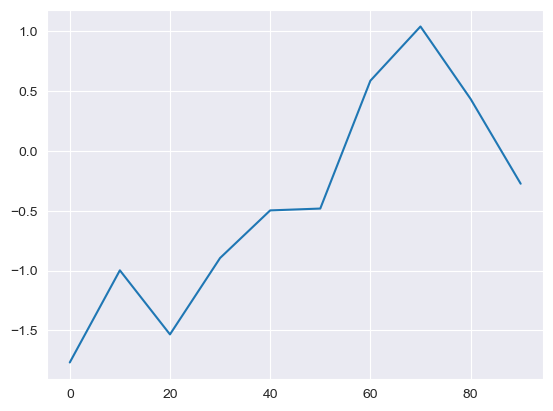

In [3]:
s.plot()

In [4]:
df = pd.DataFrame(np.random.standard_normal((10,4)).cumsum(0), columns=['A','B','C','D'], index=np.arange(0,100,10))

In [5]:
plt.style.use('grayscale')

<Axes: >

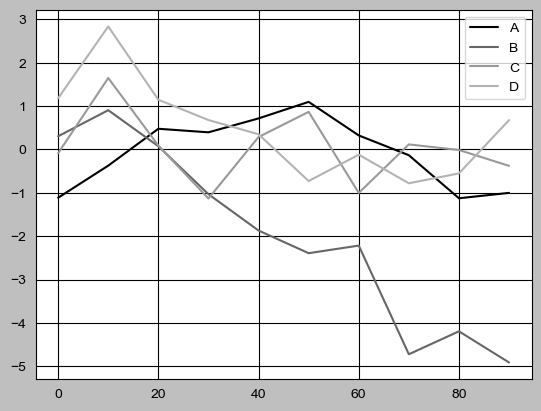

In [6]:
df.plot()

<Axes: >

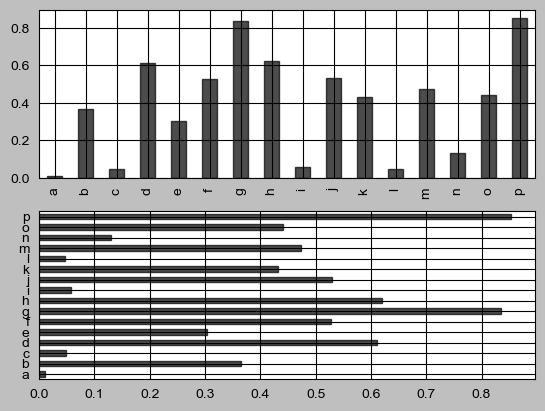

In [7]:
fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.uniform(size=16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='black', alpha=0.7)
data.plot.barh(ax=axes[1], color='black', alpha=0.7)

In [8]:
df = pd.DataFrame(np.random.standard_normal((6,4)), index=['one','two','three','four','five','six'], columns=pd.Index(['A','B','C','D'], name='Genus'))

In [9]:
df

Genus,A,B,C,D
one,1.749512,0.330763,-0.651166,0.678818
two,-1.613908,0.739256,0.175013,-0.059848
three,-0.217918,1.233867,0.715871,1.241171
four,-0.832789,0.394612,-1.587835,1.106379
five,0.616808,-1.062733,0.011160,-0.447313
six,1.728064,-0.020059,0.072096,0.752803


<Axes: >

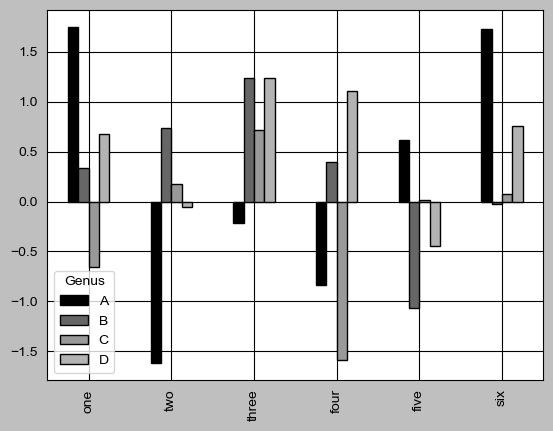

In [10]:
df.plot.bar()

<Axes: >

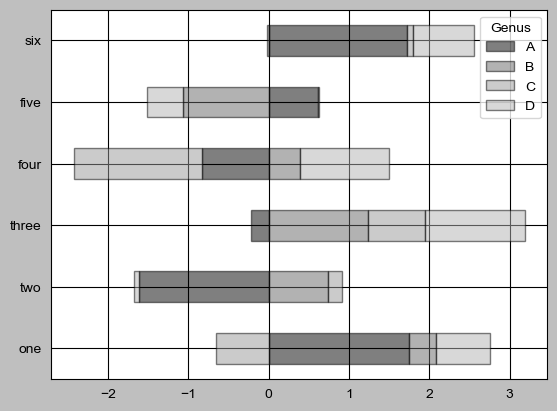

In [11]:
df.plot.barh(stacked=True, alpha=0.5)

In [12]:
tips = pd.read_csv("../pandasexamples/examples/tips.csv")

In [13]:
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [14]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [15]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [16]:
party_counts = party_counts.loc[:,2:5]

In [17]:
party_pcts = party_counts.div(party_counts.sum(axis="columns"), axis="index")

In [18]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<Axes: xlabel='day'>

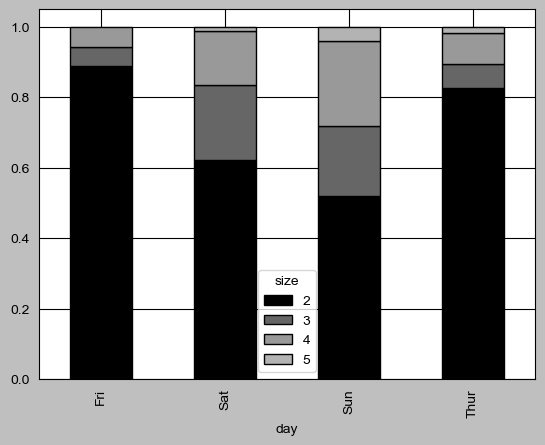

In [19]:
party_pcts.plot.bar(stacked=True)

In [20]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [21]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

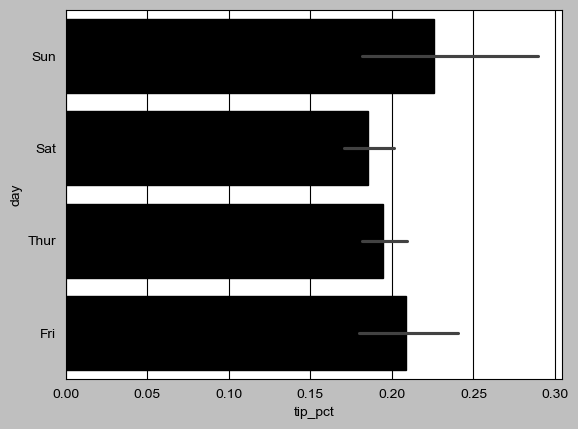

In [22]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

<Axes: xlabel='tip_pct', ylabel='day'>

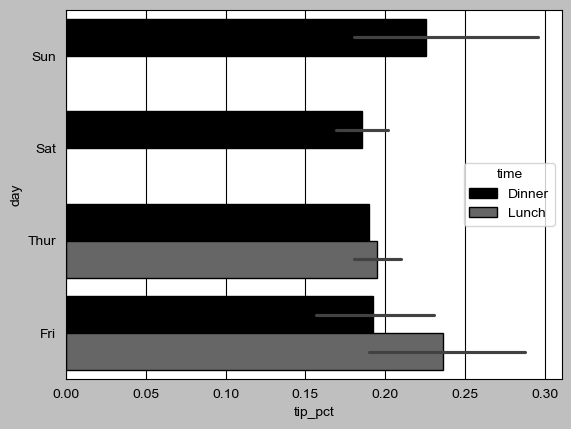

In [23]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [24]:
sns.set_style("whitegrid")
sns.set_palette("Greys_r")

In [25]:
#Histograms and Density Plots

<Axes: ylabel='Frequency'>

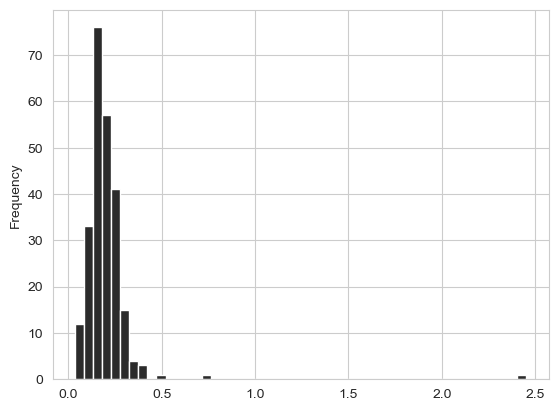

In [26]:
tips['tip_pct'].plot.hist(bins=50)

<Axes: ylabel='Density'>

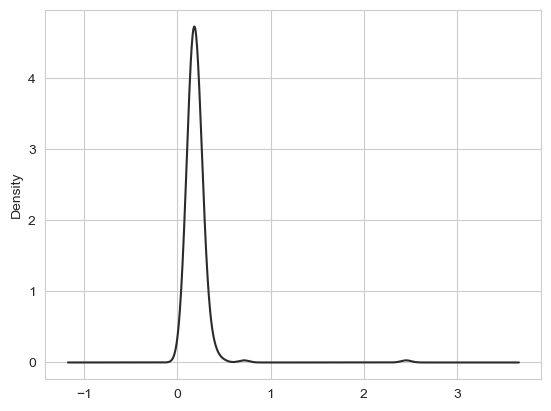

In [27]:
tips['tip_pct'].plot.density()

In [28]:
comp1 = np.random.standard_normal(200)

In [29]:
comp2 = 10 + 2 * comp1 + np.random.standard_normal(200)

In [30]:
values = pd.Series(np.concatenate([comp1, comp2]))

<Axes: ylabel='Count'>

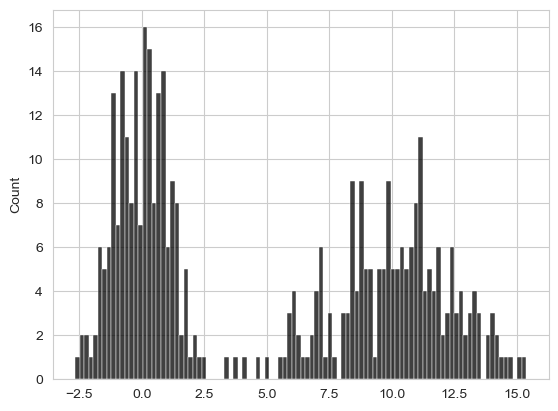

In [31]:
sns.histplot(values, bins=100, color='black')

In [32]:
macro = pd.read_csv("../pandasexamples/examples/macrodata.csv")

In [33]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [34]:
trans_data = np.log(data).diff().dropna()

In [35]:
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

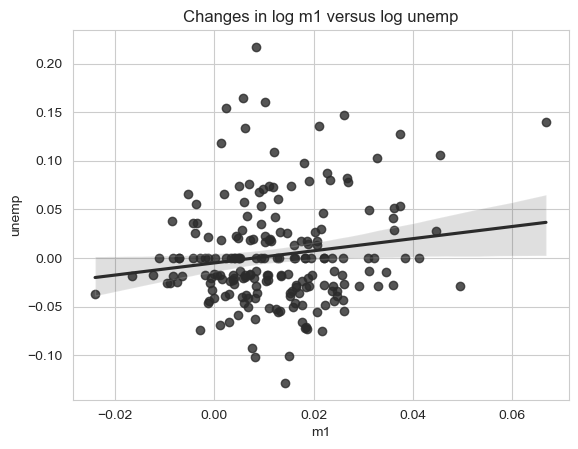

In [36]:
ax= sns.regplot(x='m1', y='unemp',data=trans_data)
ax.set_title("Changes in log %s versus log %s" % ('m1', 'unemp'))

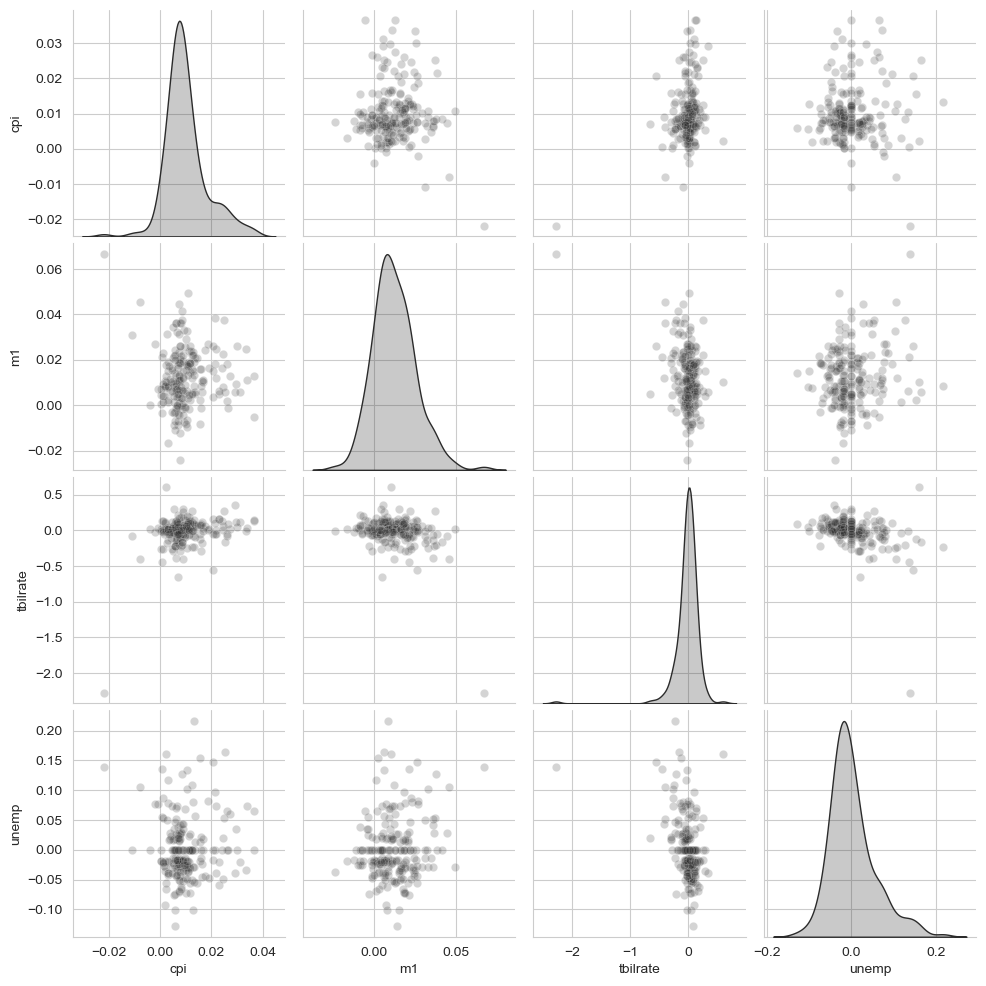

In [37]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha':0.2})

In [38]:
#Facet Grids and Categorical Data

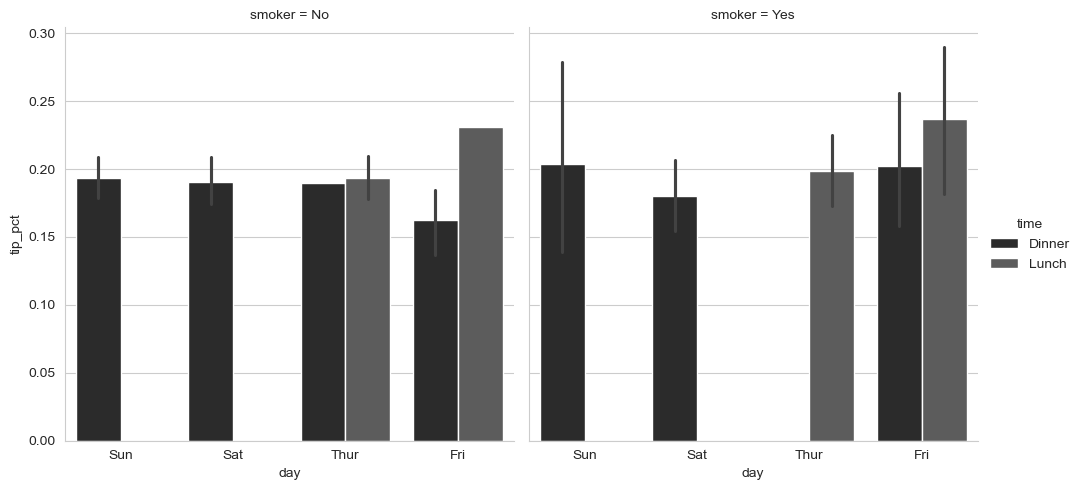

In [39]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

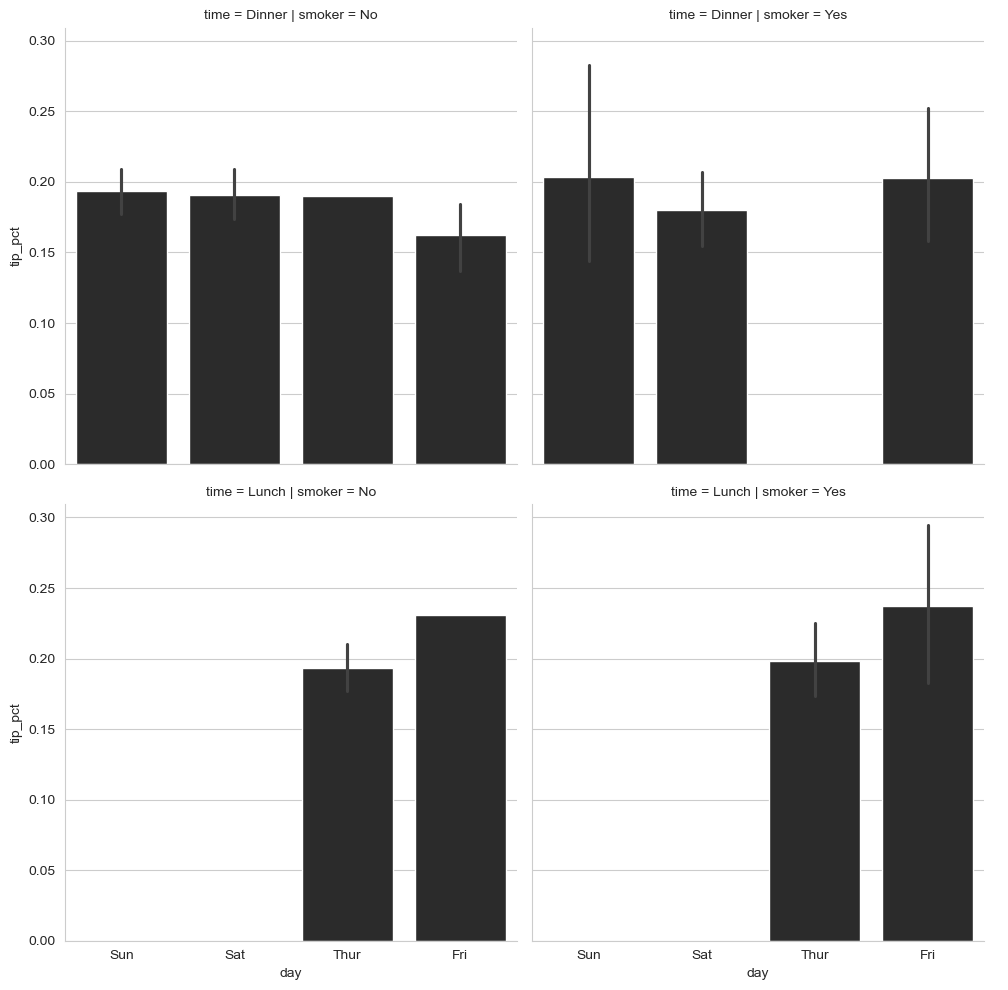

In [40]:
sns.catplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

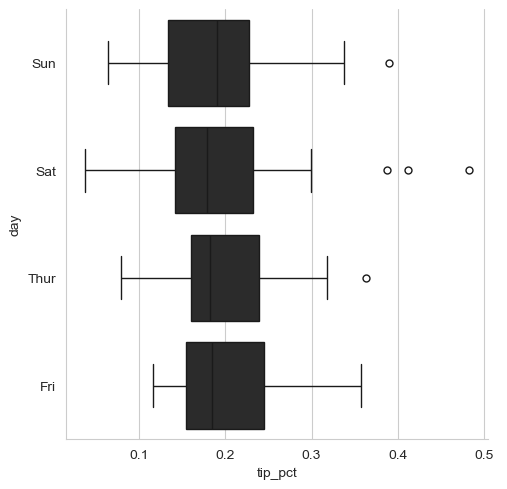

In [41]:
sns.catplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])